Processing training file ../data/mnist_train_part1.csv...
Processing training file ../data/mnist_train_part2.csv...
Processing training file ../data/mnist_train_part3.csv...
9
[[5.10752006e-04]
 [3.13754876e-03]
 [3.67937662e-03]
 [1.39726613e-02]
 [4.72803132e-03]
 [1.75318336e-03]
 [6.69351982e-04]
 [7.57870730e-03]
 [2.79322896e-03]
 [9.91301340e-01]]


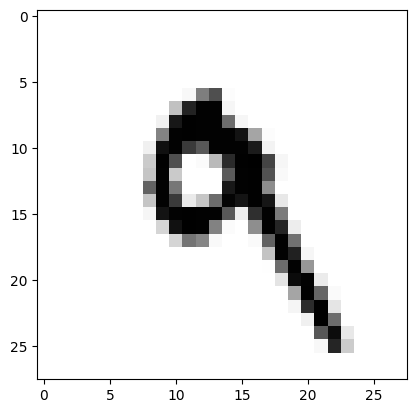

In [6]:
import numpy
import scipy.special
import matplotlib.pyplot

# Definition of a simple Neural Network
class NeuralNetwork:

    # Initializes the Neural Network
    def __init__(self, InputNodes, HiddenNodes, OutputNodes, LearningRate, Debug):
        self.InputNodes = InputNodes
        self.HiddenNodes = HiddenNodes
        self.OutputNodes = OutputNodes
        self.LearningRate = LearningRate
        self.Debug = Debug

        # Use the Sigmoid function as the Activation Function
        self.activation_function = lambda x: scipy.special.expit(x)

        # Initialize the weights between the various layers (Input Layer => Hidden Layer => Output Layer)
        self.WeightsInputToHidden = (numpy.random.rand(self.HiddenNodes, self.InputNodes) - 0.5)
        self.WeightsHiddenToOutput = (numpy.random.rand(self.OutputNodes, self.HiddenNodes) - 0.5)
        pass

    # Trains the Neural Network
    def Train(self, InputList, TargetList):
        # Calculate the input values of the Hidden Layer
        inputs = numpy.array(InputList, ndmin = 2).T
        targets = numpy.array(TargetList, ndmin = 2).T
        hiddenInputs = numpy.dot(self.WeightsInputToHidden, inputs)
        hiddenOutputs = self.activation_function(hiddenInputs)

        if (self.Debug == 1):
            print("\n==================================================")
            print("TRAINING: Calculations Input Layer => Hidden Layer")
            print("==================================================")
            print("Weights: Input Layer => Hidden Layer\n" + str(self.WeightsInputToHidden))
            print("\nInput Values:\n" + str(inputs))
            print("\nInput Values Hidden Layer - after Matrix Multiplication: \n" + str(hiddenInputs))
            print("\nInput Values Hidden Layer - after Activation Function: \n" + str(hiddenOutputs))

        # Calculate the output values of the Hidden Layer
        finalInputs = numpy.dot(self.WeightsHiddenToOutput, hiddenOutputs)
        finalOutputs = self.activation_function(finalInputs)

        if (self.Debug == 1):
            print("\n===================================================")
            print("TRAINING: Calculations Hidden Layer => Output Layer")
            print("===================================================")
            print("\nWeights: Hidden Layer => Output Layer\n" + str(self.WeightsHiddenToOutput))
            print("\nHidden Output Values:\n" + str(hiddenOutputs))
            print("\nOutput Values Hidden Layer - after Matrix Multiplication: \n" + str(finalInputs))
            print("\nOutput Values Hidden Layer - after Activation Function: \n" + str(finalOutputs))

        # Calculate the errors for both layers
        errorsOutputLayer = targets - finalOutputs
        errorsHiddenLayer = numpy.dot(self.WeightsHiddenToOutput.T, errorsOutputLayer)

        # Calculate the new weights from the Hidden Layer to the Output Layer
        self.WeightsHiddenToOutput += self.LearningRate * numpy.dot(
            (errorsOutputLayer * finalOutputs * (1.0 - finalOutputs)),
            numpy.transpose(hiddenOutputs))
        
        # Calculate the new weights from the Input Layer to the Hidden Layer
        self.WeightsInputToHidden += self.LearningRate * numpy.dot(
            (errorsHiddenLayer * hiddenOutputs * (1.0 - hiddenOutputs)),
            numpy.transpose(inputs))
        
        pass

    # Queries the Neural Network
    def Query(self, InputList):
        # Calculate the input values of the Hidden Layer
        inputs = numpy.array(InputList, ndmin = 2).T
        hiddenInputs = numpy.dot(self.WeightsInputToHidden, inputs)
        hiddenOutputs = self.activation_function(hiddenInputs)

        if (self.Debug == 1):
            print("\n===============================================")
            print("QUERY: Calculations Input Layer => Hidden Layer")
            print("===============================================")
            print("Weights: Input Layer => Hidden Layer\n" + str(self.WeightsInputToHidden))
            print("\nInput Values:\n" + str(inputs))
            print("\nInput Values Hidden Layer - after Matrix Multiplication: \n" + str(hiddenInputs))
            print("\nInput Values Hidden Layer - after Activation Function: \n" + str(hiddenOutputs))

        # Calculate the output values of the Hidden Layer
        finalInputs = numpy.dot(self.WeightsHiddenToOutput, hiddenOutputs)
        finalOutputs = self.activation_function(finalInputs)

        if (self.Debug == 1):
            print("\n================================================")
            print("QUERY: Calculations Hidden Layer => Output Layer")
            print("================================================")
            print("\nWeights: Hidden Layer => Output Layer\n" + str(self.WeightsHiddenToOutput))
            print("\nHidden Output Values:\n" + str(hiddenOutputs))
            print("\nOutput Values Hidden Layer - after Matrix Multiplication: \n" + str(finalInputs))
            print("\nOutput Values Hidden Layer - after Activation Function: \n" + str(finalOutputs))

        return finalOutputs
    
    # Processes a training file
    def ProcessTrainingFile(self, File):
        print("Processing training file " + File + "...")

        # Read the training input file
        dataFile = open(File, "r")
        dataRecords = dataFile.readlines()
        dataFile.close()

        # Train the Neural Network
        for record in dataRecords:
            rawValues = record.split(',')
            inputData = (numpy.asfarray(rawValues[1:]) / 255.0 * 0.99) + 0.01
            targetData = numpy.zeros(outputNodes) + 0.01
            targetData[int(rawValues[0])] = 0.99
            network.Train(inputData, targetData)
      
# Create a new Neural Network
inputNodes = 784
hiddenNodes = 100
outputNodes = 10
learningRate = 0.3
debug = 0
network = NeuralNetwork(inputNodes, hiddenNodes, outputNodes, learningRate, debug)

# Process the various training input file
network.ProcessTrainingFile("../data/mnist_train_part1.csv")
network.ProcessTrainingFile("../data/mnist_train_part2.csv")
network.ProcessTrainingFile("../data/mnist_train_part3.csv")

# Read the test input file
dataFile = open("../data/mnist_test_10.csv", "r")
dataRecords = dataFile.readlines()
dataFile.close()

# Query the Neural Network
rawValues = dataRecords[7].split(',')
outputValues = network.Query((numpy.asfarray(rawValues[1:]) / 255.0 * 0.99) + 0.01)

imageData = numpy.asfarray(rawValues[1:]).reshape(28, 28)
matplotlib.pyplot.imshow(imageData, cmap='Greys', interpolation='None')
print(rawValues[0])
print(outputValues)

pass